In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics as stat
import numpy as np
from sklearn.metrics import mean_squared_error
returns = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/F-F_Research_Data_Factors.CSV")

In [2]:
returns.tail()

,Date,Mkt-RF,SMB,HML,RF
1117,201908,-2.58,-2.41,-4.99,0.16
1118,201909,1.44,-0.90,6.71,0.18
1119,201910,2.06,0.25,-2.07,0.15
1120,201911,3.87,0.87,-1.86,0.12
1121,201912,2.77,0.69,1.82,0.14


In [3]:
returns.Date = pd.to_datetime(returns.Date,format = '%Y%m',errors = 'ignore')
returns.set_index("Date",inplace = True)
returns = returns/100
returns.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0296,-0.0230,-0.0287,0.0022
1926-08-01,0.0264,-0.0140,0.0419,0.0025
1926-09-01,0.0036,-0.0132,0.0001,0.0023
1926-10-01,-0.0324,0.0004,0.0051,0.0032
1926-11-01,0.0253,-0.0020,-0.0035,0.0031


a)

Text(0.5, 1.0, 'Monthly Market Excess Returns')

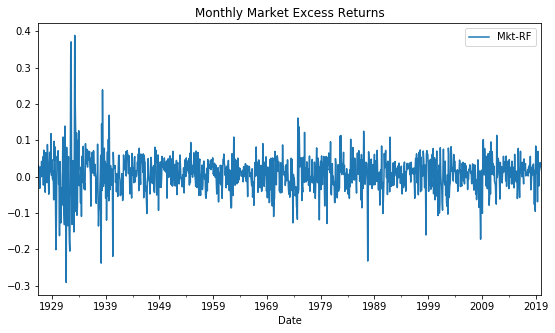

In [4]:
returns.plot(y=["Mkt-RF"], figsize=(9,5))
plt.title("Monthly Market Excess Returns")

Text(0.5, 1.0, 'Histogram of Market Excess Returns')

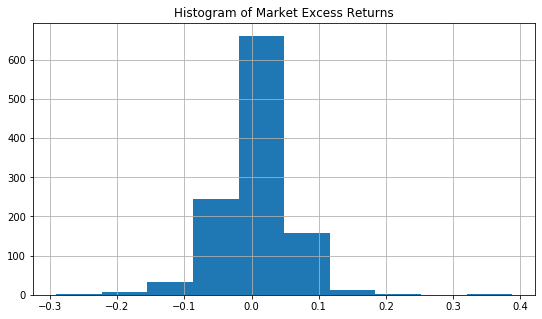

In [5]:
returns.hist(column='Mkt-RF',figsize=(9,5))
plt.title("Histogram of Market Excess Returns")

In [6]:
train,test = returns['1926-07-01':'2013-12-01'],returns['2014-01-01':'2019-12-01']

In [7]:
train.shape[0]

1050

b)

In [8]:
sigma = 0.054
m = 0.05
nu = 0.03
R_bar = train['Mkt-RF'].mean()
T = train.shape[0]
m_T = (m*sigma**2+T*R_bar*nu**2)/(sigma**2+T*nu**2)
nu_T = ((nu**2*sigma**2)/(sigma**2+T*nu**2))**1/2
print(round(m_T*100,5))

0.66395


d)

In [9]:
sigma = 0.054
m = 0.05
nu = 0.03
m_T = []
nu_T = []
for i in range(train.shape[0],returns.shape[0]):
    R_bar = returns.iloc[:i,0].mean()
    T = i
    mi = (m*(sigma**2)+T*R_bar*(nu**2))/(sigma**2+T*(nu**2))
    nui = (((nu**2)*(sigma**2))/((sigma**2)+T*(nu**2)))**(1/2)
    m_T.append(mi)
    nu_T.append(nui)
    m = mi
    nu = nui

In [10]:
print(m_T)
print(nu_T)
print(round(mean_squared_error(test['Mkt-RF'], m_T),5))

[0.006639512361854853, 0.00655381515416493, 0.006537874179403347, 0.006529373473596191, 0.006522674246281765, 0.006520439236243011, 0.006521499164659687, 0.0065191003932992125, 0.006521017489282604, 0.006520064010678564, 0.006520893778901888, 0.006523082678992587, 0.006524414401030063, 0.006523011658591455, 0.006525251225861133, 0.0065261616569876725, 0.0065269294311488465, 0.006527982435149855, 0.006527839063736075, 0.006528128780686675, 0.0065253844453907, 0.0065212923154986, 0.0065204677164528435, 0.006519676411070348, 0.006517886329502542, 0.006513911128613335, 0.006509982497359278, 0.006508456330226683, 0.006507123960278999, 0.006506235158856595, 0.006505192281599506, 0.00650518310672027, 0.006505131712242096, 0.006504972943042517, 0.00650410835959071, 0.006504387868418071, 0.006504947969647193, 0.006505795660962457, 0.006507299329595651, 0.006508614120856676, 0.006509963704526955, 0.006511338788334912, 0.006512676675299595, 0.006514211045607527, 0.0065155739954447555, 0.006517253

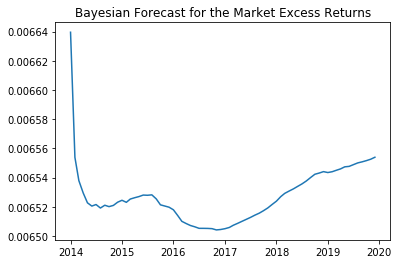

In [11]:
plt.plot(test.index,m_T)
plt.title('Bayesian Forecast for the Market Excess Returns')
plt.show()

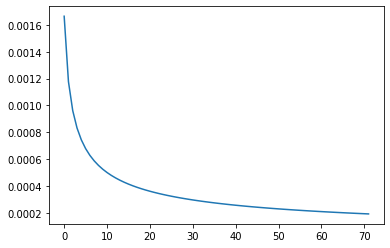

1121


In [12]:
plt.plot(nu_T)
plt.show()
print(T)

e)

In [13]:
returns['lag_mktrf'] = returns['Mkt-RF'].shift(1)
train,test = returns['1926-07-01':'2013-12-01'],returns['2014-01-01':'2019-12-01']
train = train.iloc[1:,]
train.head()

,Mkt-RF,SMB,HML,RF,lag_mktrf
Date,,,,,
1926-08-01,0.0264,-0.0140,0.0419,0.0025,0.0296
1926-09-01,0.0036,-0.0132,0.0001,0.0023,0.0264
1926-10-01,-0.0324,0.0004,0.0051,0.0032,0.0036
1926-11-01,0.0253,-0.0020,-0.0035,0.0031,-0.0324
1926-12-01,0.0262,-0.0004,-0.0002,0.0028,0.0253


In [14]:
y_train,x_train = train['Mkt-RF'],train['lag_mktrf']
x_train = sm.add_constant(x_train)
ols_mod = sm.OLS(y_train, x_train).fit()
print(ols_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Mkt-RF   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.68
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           0.000228
Time:                        13:44:37   Log-Likelihood:                 1574.6
No. Observations:                1049   AIC:                            -3145.
Df Residuals:                    1047   BIC:                            -3135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.002      3.424      0.0

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


f)

Mean =  0.006483698760724497 Variance =  3.804910316579635e-05


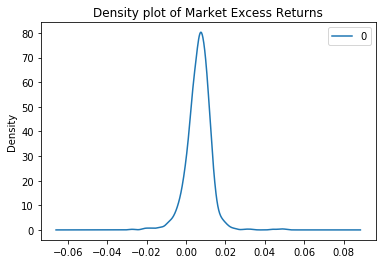

In [15]:
#predicting on the training set to obtain distribution, mean and variance
preds = ols_mod.predict(x_train)
preds = pd.DataFrame(preds)
preds.plot(kind = 'kde')
plt.title("Density plot of Market Excess Returns")
print('Mean = ',preds.mean()[0],'Variance = ',preds.var()[0])

In [16]:
print(ols_mod.params)
#mean estimate of excess returns of market 
alpha_0 = ols_mod.params[0]
alpha_1 = ols_mod.params[1]

const        0.005747
lag_mktrf    0.113574
dtype: float64


Text(0.5, 1.0, 'Predicted Out of Sample Mean Excess Returns')

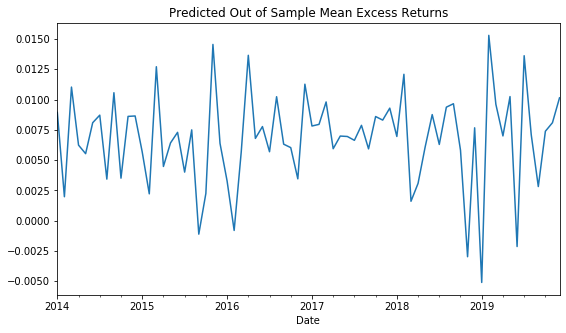

In [17]:
y_test,x_test = test['Mkt-RF'],test['lag_mktrf']
x_test = sm.add_constant(x_test)
preds_test = ols_mod.predict(x_test)

preds_test.plot(figsize=(9,5))
plt.title("Predicted Out of Sample Mean Excess Returns")

In [18]:
#mean estimate are the predicted market excess returns
mu_est = preds_test
#print(ols_mod.resid)
#variance estimate of excess returns of the market are variance of residuals
var_est = stat.variance(ols_mod.resid)
print(var_est)

0.0029116324915372653


In [19]:
print(round(mean_squared_error(y_test, preds_test),5))

0.00124


h)

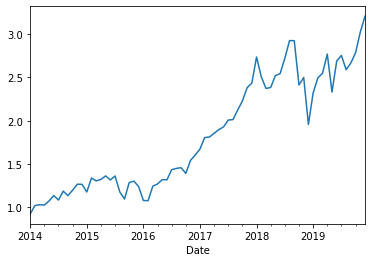

In [20]:
#bayesian approach, alpha = 1
alpha = 1
cap = 1
mu = np.array(m_T)
nu_T = np.array(nu_T)
sigma2 = sigma**2 + nu_T**2
w_t = mu/(alpha*sigma2)
port_ret_bayes = w_t*test['Mkt-RF'] + (1-w_t)*test['RF']
port_ret_bayes = np.cumprod(1+port_ret_bayes)
port_ret_bayes.plot()

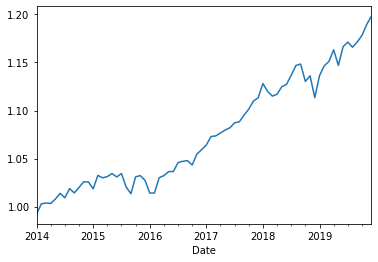

In [21]:
#bayesian approach, alpha = 10
alpha = 10
cap = 1
mu = np.array(m_T)
nu_T = np.array(nu_T)
sigma2 = sigma**2 + nu_T**2
w_t = mu/(alpha*sigma2)
port_ret_bayes2 = w_t*test['Mkt-RF'] + (1-w_t)*test['RF']
port_ret_bayes2 = np.cumprod(1+port_ret_bayes2)
port_ret_bayes2.plot()

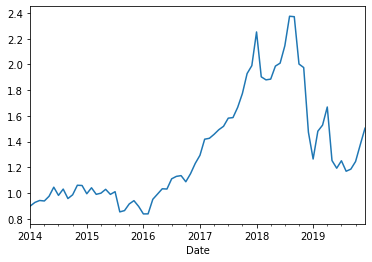

In [22]:
#ols approach alpha = 1
alpha = 1
w_t = mu_est/(alpha*var_est)
port_ret_ols = w_t*test['Mkt-RF'] + (1-w_t)*test['RF']
port_ret_ols = np.cumprod(1+port_ret_ols)
port_ret_ols.plot()

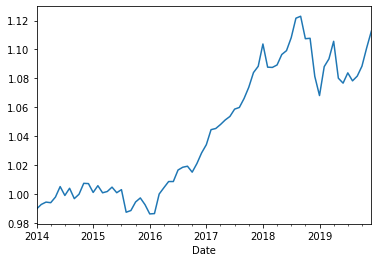

In [23]:
#ols approach alpha = 10
alpha = 10
w_t = mu_est/(alpha*var_est)
port_ret_ols2 = w_t*test['Mkt-RF'] + (1-w_t)*test['RF']
port_ret_ols2 = np.cumprod(1+port_ret_ols2)
port_ret_ols2.plot()

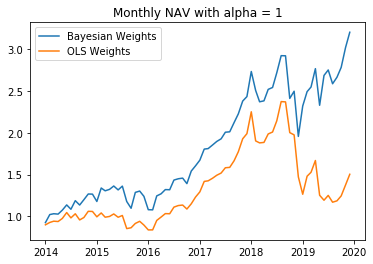

In [24]:
plt.plot(port_ret_bayes, label = 'Bayesian Weights')
plt.plot(port_ret_ols, label = 'OLS Weights')
plt.legend()
plt.title("Monthly NAV with alpha = 1")
plt.show()

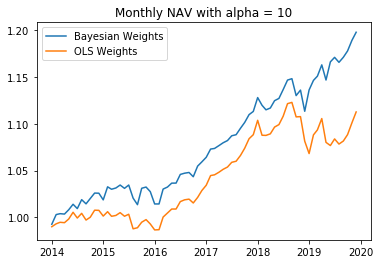

In [25]:
plt.plot(port_ret_bayes2, label = 'Bayesian Weights')
plt.plot(port_ret_ols2,label = 'OLS Weights')
plt.legend()
plt.title("Monthly NAV with alpha = 10")
plt.show()